In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("F:/BA_Assigments/Loan Status Prediction/train.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
df['Loan_ID'].count()

614

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# DATA Cleaning 

In [6]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

In [7]:
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

In [8]:
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

In [9]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

In [10]:
df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())

In [11]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

In [12]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

In [13]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
df['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [15]:
df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [16]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [17]:
df['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [18]:
df['ApplicantIncome'].unique()

array([ 5849,  4583,  3000,  2583,  6000,  5417,  2333,  3036,  4006,
       12841,  3200,  2500,  3073,  1853,  1299,  4950,  3596,  3510,
        4887,  2600,  7660,  5955,  3365,  3717,  9560,  2799,  4226,
        1442,  3750,  4166,  3167,  4692,  3500, 12500,  2275,  1828,
        3667,  3748,  3600,  1800,  2400,  3941,  4695,  3410,  5649,
        5821,  2645,  4000,  1928,  3086,  4230,  4616, 11500,  2708,
        2132,  3366,  8080,  3357,  3029,  2609,  4945,  5726, 10750,
        7100,  4300,  3208,  1875,  4755,  5266,  1000,  3333,  3846,
        2395,  1378,  3988,  2366,  8566,  5695,  2958,  6250,  3273,
        4133,  3620,  6782,  2484,  1977,  4188,  1759,  4288,  4843,
       13650,  4652,  3816,  3052, 11417,  7333,  3800,  2071,  5316,
        2929,  3572,  7451,  5050, 14583,  2214,  5568, 10408,  5667,
        2137,  2957,  3692, 23803,  3865, 10513,  6080, 20166,  2014,
        2718,  3459,  4895,  3316, 14999,  4200,  5042,  6950,  2698,
       11757,  2330,

<AxesSubplot:>

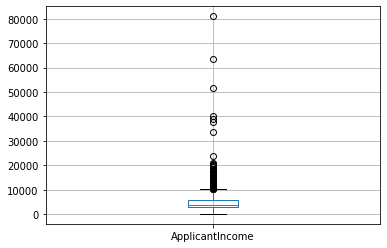

In [19]:
df.boxplot(column='ApplicantIncome')

<AxesSubplot:>

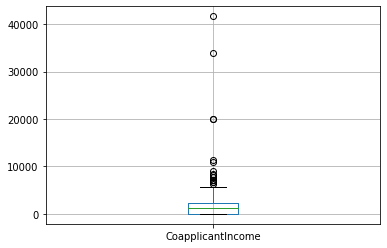

In [20]:
df.boxplot(column='CoapplicantIncome')

In [21]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

<AxesSubplot:>

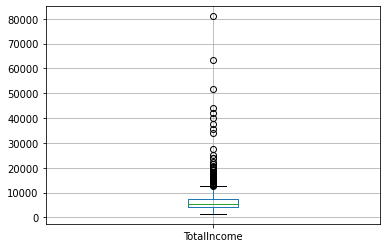

In [22]:
df.boxplot(column='TotalIncome')

In [23]:
pd.crosstab(df['Property_Area'],df['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Property_Area,,,
Rural,69,110,179
Semiurban,54,179,233
Urban,69,133,202
All,192,422,614


In [24]:
#Education
pd.crosstab(df['Education'],df['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Education,,,
Graduate,140,340,480
Not Graduate,52,82,134
All,192,422,614


In [25]:
pd.crosstab(df['Self_Employed'],df['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Self_Employed,,,
No,166,366,532
Yes,26,56,82
All,192,422,614


In [26]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
TotalIncome          float64
dtype: object

In [27]:
df['Dependents'] = pd.to_numeric(df.Dependents,errors='coerce')

In [28]:
#df['Dependents']
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

In [29]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
TotalIncome          0
dtype: int64

## Encoding

#### Gender,Education,Self_Employed,Property_Area label Encoding

In [30]:
#df = pd.get_dummies(df, columns = ['Gender','Married','Education','Self_Employed','Property_Area'])
#df.head()

# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
df['Gender']= label_encoder.fit_transform(df['Gender'])
df['Married']= label_encoder.fit_transform(df['Married'])
df['Education']= label_encoder.fit_transform(df['Education'])
df['Self_Employed']= label_encoder.fit_transform(df['Self_Employed'])
df['Property_Area']= label_encoder.fit_transform(df['Property_Area'])
df['Loan_Status']=df['Loan_Status'].map({'Y':1,'N':0})
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,1,0,0.0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,5849.0
1,LP001003,1,1,1.0,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,6091.0
2,LP001005,1,1,0.0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,3000.0
3,LP001006,1,1,0.0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,4941.0
4,LP001008,1,0,0.0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,6000.0


In [31]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'TotalIncome'],
      dtype='object')

In [32]:
X=df[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','TotalIncome','LoanAmount','Loan_Amount_Term','Credit_History']]
y=df['Loan_Status']


In [33]:
X.shape,y.shape

((614, 11), (614,))

## Spliting the DATA

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
X_train.shape,X_test.shape

((429, 11), (185, 11))

## scal the data

In [43]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Prediction Using KNN Classification Model

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)
knnpreds = knn_model.predict(X_test)

In [45]:
Result = pd.DataFrame({'Actual': y_test, 'Predicted': knnpreds})
Result

,Actual,Predicted
285,1,1
323,1,1
482,1,1
173,1,1
518,0,1
...,...,...
333,1,1
98,1,0
295,1,1
166,0,1


In [46]:
Result['Actual']=Result['Actual'].map({1:'Y',0:'N'})
Result['Predicted']=Result['Predicted'].map({1:'Y',0:'N'})

## Confusion Matrix

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

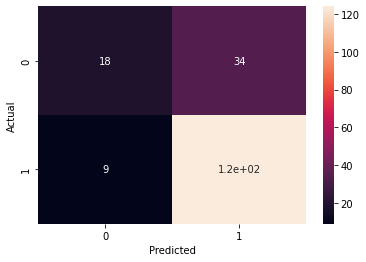

In [47]:
import seaborn as sn # plotting the data
confusion_matrix = pd.crosstab(y_test, knnpreds, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

## Evaluate knn classification model

Test set accuracy: 0.77
Test set auc: 0.64
Train set AUC :  0.7593178447849729


c:\users\sivashanmugavadivel\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


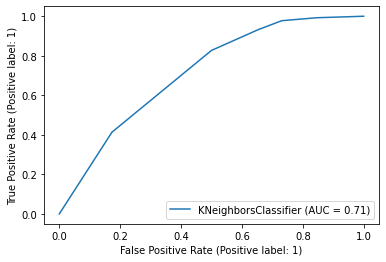

In [48]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
#we compute the eval metric on test/validation set only primarily

# Predict test set labels
knnpred = knn_model.predict(X_test) 

# Compute test set accuracy
acc = accuracy_score(y_test, knnpred)
print("Test set accuracy: {:.2f}".format(acc))
acc = roc_auc_score(y_test, knnpred)
print("Test set auc: {:.2f}".format(acc))
plot_roc_curve(knn_model, X_test, y_test)


acc = roc_auc_score(y_train, knn_model.predict(X_train))
print("Train set AUC : ", acc)

## Prediction Using Decision Tree Classification Model

In [85]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth 
dt = DecisionTreeClassifier(criterion='entropy',random_state=0)

# Fit dt to the training set
dt.fit(X_train, y_train) # it will ask all possible questions, compute the information gain and choose the best split

# Predict test set labels
dty_pred = dt.predict(X_test)


In [86]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': dty_pred})
df

,Actual,Predicted
285,1,1
323,1,1
482,1,1
173,1,1
518,0,1
...,...,...
333,1,1
98,1,1
295,1,1
166,0,1


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

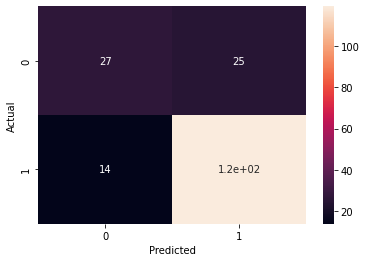

In [87]:
import seaborn as sn # plotting the data
confusion_matrix = pd.crosstab(y_test, dty_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

Test set accuracy: 0.79
Test set auc: 0.71
Train set AUC :  1.0


c:\users\sivashanmugavadivel\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


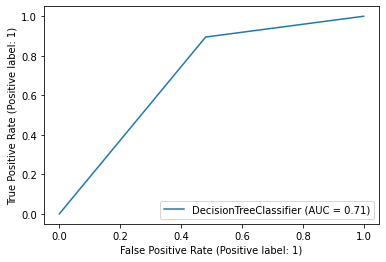

In [88]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
#we compute the eval metric on test/validation set only primarily

# Predict test set labels
dty_pred = dt.predict(X_test) 

# Compute test set accuracy
acc = accuracy_score(y_test, dty_pred)
print("Test set accuracy: {:.2f}".format(acc))
acc = roc_auc_score(y_test, dty_pred)
print("Test set auc: {:.2f}".format(acc))
plot_roc_curve(dt, X_test, y_test)


acc = roc_auc_score(y_train, dt.predict(X_train))
print("Train set AUC : ", acc)

In [63]:

##there are 1 param to play with - max depth - to choose the best parameter, I will try different combinations and hoose the one which has the best accuracy/auc/any eval metric on cross-validation or test data-set
from sklearn.model_selection import cross_val_score #this will help me to do cross- validation
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20]:
    dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
    dt.fit(X_train, y_train) # the model is trained
    trainAccuracy = accuracy_score(y_train, dt.predict(X_train)) # this is useless information - i am showing to prove a point
    dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
    valAccuracy = cross_val_score(dt, X_train, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
    print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.8135198135198135  Cross val score :  0.8133444075304539
Depth  :  2  Training Accuracy :  0.8275058275058275  Cross val score :  0.8086932447397566
Depth  :  3  Training Accuracy :  0.8344988344988346  Cross val score :  0.8087486157253598
Depth  :  4  Training Accuracy :  0.8391608391608392  Cross val score :  0.799390919158361
Depth  :  5  Training Accuracy :  0.8531468531468531  Cross val score :  0.7946843853820598
Depth  :  6  Training Accuracy :  0.8741258741258742  Cross val score :  0.7807308970099668
Depth  :  7  Training Accuracy :  0.8834498834498834  Cross val score :  0.7875968992248062
Depth  :  8  Training Accuracy :  0.8997668997668997  Cross val score :  0.7690476190476191
Depth  :  9  Training Accuracy :  0.9137529137529138  Cross val score :  0.7713732004429679
Depth  :  10  Training Accuracy :  0.9230769230769231  Cross val score :  0.7644518272425249
Depth  :  20  Training Accuracy :  1.0  Cross val score :  0.7201550387596899


## Prediction Using RandomForest Classification Model

In [76]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100) 
clf.fit(X_train, y_train)
y_rfpred = clf.predict(X_test)
y_rfpred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [77]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_rfpred})
df

,Actual,Predicted
285,1,1
323,1,1
482,1,1
173,1,1
518,0,1
...,...,...
333,1,1
98,1,1
295,1,1
166,0,1


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

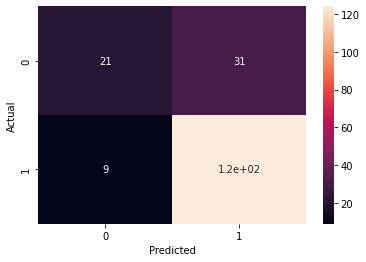

In [78]:
import seaborn as sn # plotting the data
confusion_matrix = pd.crosstab(y_test, y_rfpred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

Test set accuracy: 0.7837837837837838
Test set auc: 0.67
Train set AUC :  1.0


c:\users\sivashanmugavadivel\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


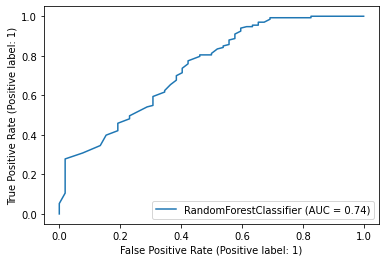

In [83]:
y_rfpred = clf.predict(X_test) 

# Compute test set accuracy
acc = accuracy_score(y_test, y_rfpred)
print("Test set accuracy:",acc)
acc = roc_auc_score(y_test, y_rfpred)
print("Test set auc: {:.2f}".format(acc))
plot_roc_curve(clf, X_test, y_test)


acc = roc_auc_score(y_train, clf.predict(X_train))
print("Train set AUC : ", acc)

## Prediction Using XG Boost Classification Mode

In [89]:
import xgboost as xg
xgb_c = xg.XGBClassifier(n_estimators = 100)
  
# Fitting the model
xgb_c.fit(X_train, y_train)
  
# Predict the model
xgpred = xgb_c.predict(X_test)
  
xgbooster_prediction=pd.DataFrame({'Actual': y_test, 'Predicted': xgpred})
xgbooster_prediction

,Actual,Predicted
285,1,1
323,1,1
482,1,1
173,1,1
518,0,1
...,...,...
333,1,1
98,1,1
295,1,1
166,0,1


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

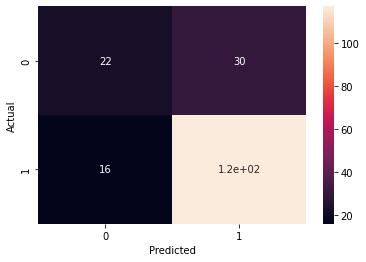

In [90]:
import seaborn as sn # plotting the data
confusion_matrix = pd.crosstab(y_test, xgpred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

Test set accuracy:  0.7513513513513513
Test set auc:  0.6513880855986119
Train set AUC :  1.0


c:\users\sivashanmugavadivel\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


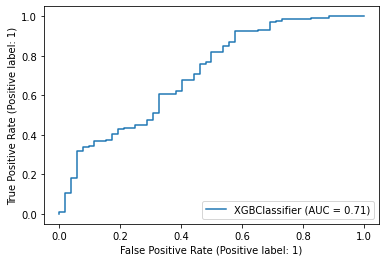

In [91]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
#we compute the eval metric on test/validation set only primarily

# Predict test set labels
xgpred = xgb_c.predict(X_test) 

# Compute test set accuracy
acc = accuracy_score(y_test, xgpred)
print("Test set accuracy: ",acc)
acc = roc_auc_score(y_test, xgpred)
print("Test set auc: ",acc)
plot_roc_curve(xgb_c, X_test, y_test)


acc = roc_auc_score(y_train, xgb_c.predict(X_train))
print("Train set AUC : ", acc)